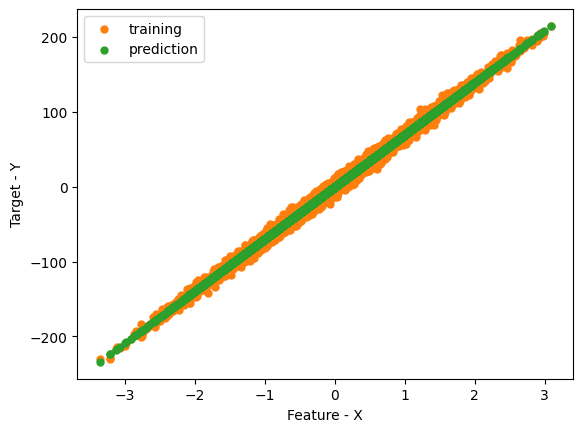

In [1]:
# Simple regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# create a sample dataset 
X,Y = make_regression(n_features=1, noise=5, n_samples=5000)

plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

# Build the model
linear_model = LinearRegression()
linear_model.fit(X,Y)

linear_model.coef_
linear_model.intercept_

# prediction
pred = linear_model.predict(X)
plt.scatter(X,Y,s=25, label='training')
plt.scatter(X,pred,s=25, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import random
from datetime import datetime

# Set seed for reproducibility
np.random.seed(42)

# Number of rows
n = 21613

# Define possible values for categorical features
roof_types = ['Shingle', 'Tile', 'Metal', 'Flat']
heating_types = ['ForcedAir', 'HeatPump', 'Radiant', 'Baseboard']
neighborhoods = ['Urban', 'Suburban', 'Rural']
conditions = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Start generating data
data = {
    'HouseID': range(1, n+1),
    'SquareFeet': np.random.randint(800, 5000, size=n),
    'Bedrooms': np.random.randint(1, 7, size=n),
    'Bathrooms': np.round(np.random.uniform(1, 4, size=n), 1),
    'GarageSize': np.random.randint(0, 4, size=n),
    'YearBuilt': np.random.randint(1950, 2023, size=n),
    'LotSize': np.random.randint(2000, 20000, size=n),
    'Stories': np.random.choice([1, 2, 3], size=n, p=[0.5, 0.4, 0.1]),
    'Fireplaces': np.random.randint(0, 3, size=n),
    'Pool': np.random.choice([0, 1], size=n, p=[0.85, 0.15]),
    'Basement': np.random.choice([0, 1], size=n, p=[0.3, 0.7]),
    'RoofType': np.random.choice(roof_types, size=n),
    'HeatingType': np.random.choice(heating_types, size=n),
    'Cooling': np.random.choice([0, 1], size=n, p=[0.2, 0.8]),
    'Neighborhood': np.random.choice(neighborhoods, size=n, p=[0.4, 0.4, 0.2]),
    'Condition': np.random.choice(conditions, size=n, p=[0.1, 0.2, 0.4, 0.2, 0.1]),
    'Renovated': np.random.choice([0, 1], size=n, p=[0.7, 0.3]),
    'DistanceToCityCenter': np.round(np.random.uniform(1, 30, size=n), 1),
    'SchoolRating': np.random.randint(1, 11, size=n),
}

# Create DataFrame
df = pd.DataFrame(data)

# Derive Age from YearBuilt
current_year = datetime.now().year
df['Age'] = current_year - df['YearBuilt']

# Generate Price based on features
# You can tweak the coefficients to adjust influence
price_base = 100000
df['Price'] = price_base + \
    df['SquareFeet'] * 150 + \
    df['Bedrooms'] * 10000 + \
    df['Bathrooms'] * 8000 + \
    df['GarageSize'] * 5000 + \
    df['LotSize'] * 0.5 + \
    df['Fireplaces'] * 3000 + \
    df['Pool'] * 15000 + \
    df['Basement'] * 10000 + \
    df['Cooling'] * 7000 + \
    df['Renovated'] * 20000 + \
    df['SchoolRating'] * 5000 + \
    (df['Condition'].map({
        'Poor': -20000,
        'Fair': -10000,
        'Good': 0,
        'Very Good': 10000,
        'Excellent': 20000
    })) - \
    df['Age'] * 1000 + \
    np.random.normal(0, 20000, size=n)  # Add noise

# Round Price to nearest hundred
df['Price'] = np.round(df['Price'], -2)

# Reorder columns to put Price at front
cols = ['HouseID', 'Price'] + [col for col in df.columns if col not in ['HouseID', 'Price']]
df = df[cols]

# Show first few rows
print(df.head())

# Save to CSV
df.to_csv('house_prices.csv', index=False)

   HouseID     Price  SquareFeet  Bedrooms  Bathrooms  GarageSize  YearBuilt  \
0        1  435000.0        1660         3        1.2           1       2005   
1        2  825600.0        4572         1        1.5           2       1989   
2        3  781000.0        3892         5        4.0           0       2008   
3        4  376800.0        1266         5        2.2           0       1961   
4        5  861600.0        4244         2        3.7           3       1965   

   LotSize  Stories  Fireplaces  ...  Basement  RoofType HeatingType Cooling  \
0    12853        1           0  ...         1   Shingle     Radiant       1   
1    16184        1           1  ...         0      Flat    HeatPump       1   
2     7941        1           0  ...         1      Flat   ForcedAir       1   
3    10314        1           2  ...         1     Metal    HeatPump       1   
4    17614        3           2  ...         1   Shingle     Radiant       1   

   Neighborhood  Condition Renovated  

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Load the data ---
df = pd.read_csv('house_prices.csv')

# --- Feature Engineering: One-hot encode categorical variables ---
categorical_cols = ['RoofType', 'HeatingType', 'Neighborhood', 'Condition']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- Define features (X) and target (y) ---
X = df_encoded.drop(columns=['HouseID', 'Price', 'YearBuilt'])  # Drop ID, target, and YearBuilt (we have Age)
y = df_encoded['Price']

# --- Train-test split (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Fit the multiple regression model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predict on test set ---
y_pred = model.predict(X_test)

# --- Evaluate the model ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- Output results ---
print("\nMultiple Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Optional: Show feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 10 Features by Absolute Coefficient:")
print(coef_df.head(10))


Multiple Regression Model Performance:
Mean Squared Error (MSE): 411,278,392.88
R-squared (R²): 0.9881

Top 10 Features by Absolute Coefficient:
                Feature   Coefficient
24       Condition_Poor -39305.591950
22       Condition_Fair -28622.370411
10            Renovated  20764.984841
23       Condition_Good -18913.497450
7                  Pool  15216.646645
8              Basement  10356.254703
1              Bedrooms  10088.437224
25  Condition_Very Good  -8512.350721
2             Bathrooms   8127.560287
9               Cooling   7334.519159



Decision Tree Regressor Performance:
Mean Squared Error (MSE): 1,140,067,519.02
R-squared (R²): 0.9670

Top 10 Important Features:
                 Feature  Importance
0             SquareFeet    0.968869
13                   Age    0.012435
1               Bedrooms    0.007491
12          SchoolRating    0.005928
10             Renovated    0.001558
2              Bathrooms    0.001176
4                LotSize    0.000450
24        Condition_Poor    0.000318
3             GarageSize    0.000306
11  DistanceToCityCenter    0.000295


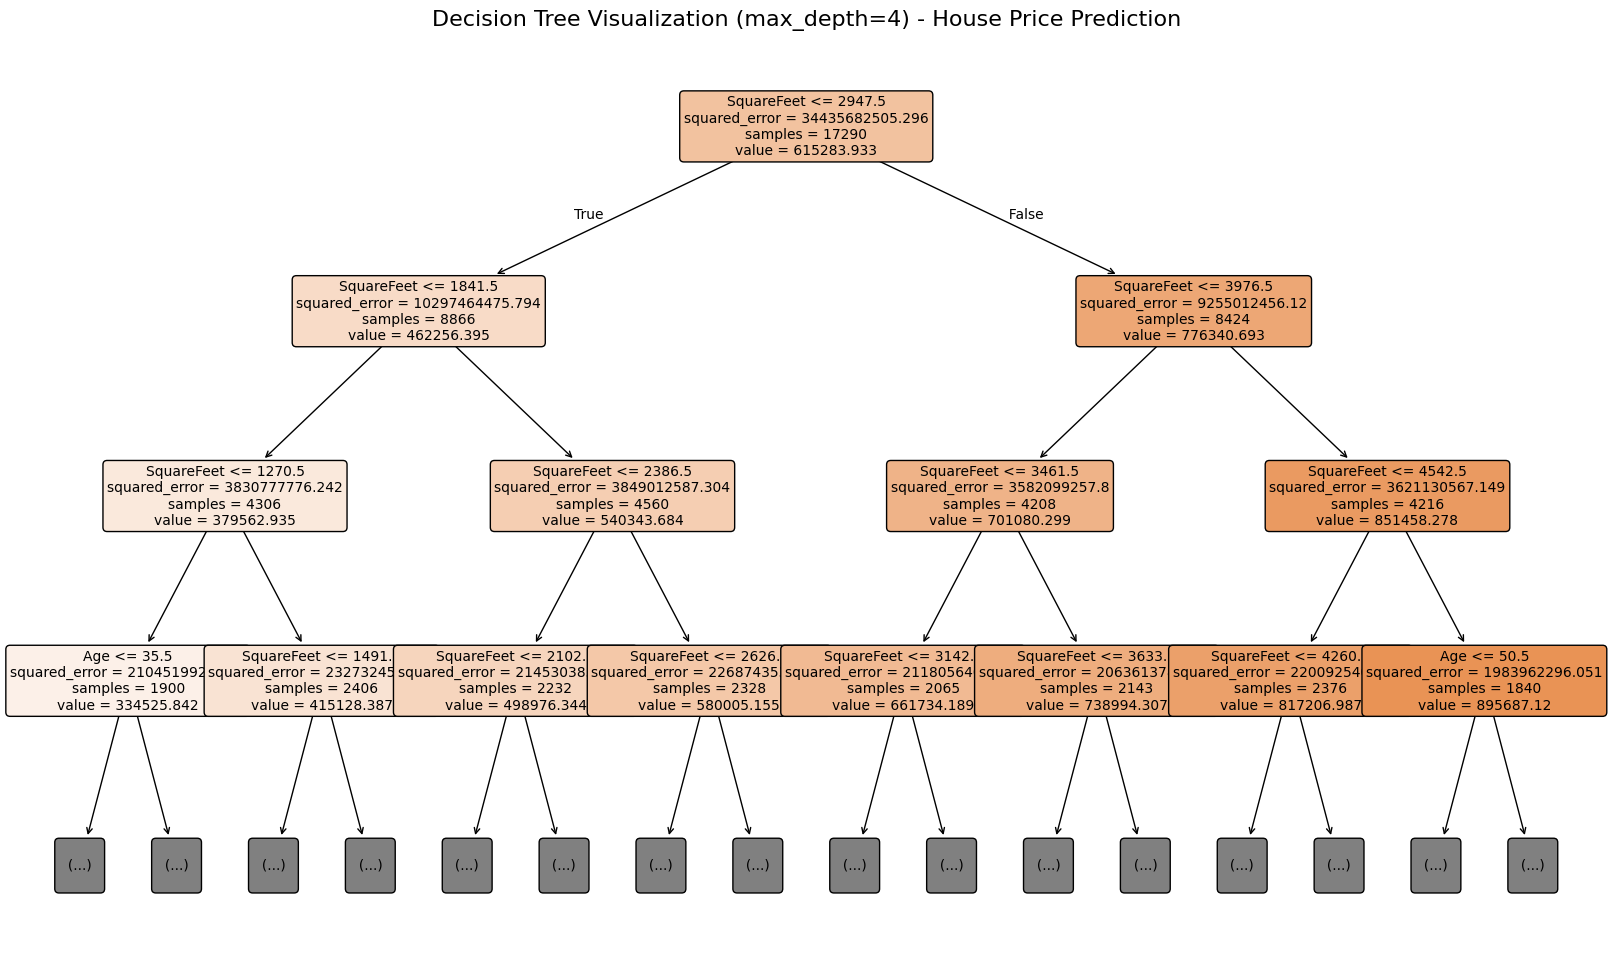

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- Load the data ---
df = pd.read_csv('house_prices.csv')

# --- Feature Engineering: One-hot encode categorical variables ---
categorical_cols = ['RoofType', 'HeatingType', 'Neighborhood', 'Condition']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- Define features (X) and target (y) ---
X = df_encoded.drop(columns=['HouseID', 'Price', 'YearBuilt'])  # Drop ID, target, and redundant YearBuilt
y = df_encoded['Price']

# --- Train-test split (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Fit the Decision Tree Regressor ---
tree_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,           # Prevent overfitting
    min_samples_split=10,   # Minimum samples to split
    min_samples_leaf=5      # Minimum samples in leaf
)

tree_model.fit(X_train, y_train)

# --- Predict on test set ---
y_pred_tree = tree_model.predict(X_test)

# --- Evaluate the model ---
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# --- Output results ---
print("\nDecision Tree Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_tree:,.2f}")
print(f"R-squared (R²): {r2_tree:.4f}")

# --- Optional: Feature importance ---
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))

# --- Plot the tree ---
plt.figure(figsize=(20, 12))
plot_tree(
    tree_model,
    feature_names=X.columns,
    filled=True,           # Color nodes by target value
    rounded=True,          # Rounded boxes
    fontsize=10,
    max_depth= 3         # Only show up to max_depth
)
plt.title("Decision Tree Visualization (max_depth=4) - House Price Prediction", fontsize=16)
plt.show()

First few rows:
   VehicleID  EngineSize  Cylinders FuelType  Weight          DriveType  \
0          1         2.5          5   Diesel    2293    All-wheel Drive   
1          2         4.8          3   Petrol    2245  Front-wheel Drive   
2          3         3.9          4   Petrol    3207  Front-wheel Drive   
3          4         3.4          6   Hybrid    5520  Front-wheel Drive   
4          5         1.6          4   Hybrid    4393  Front-wheel Drive   

   CityMPG  HighwayMPG  CombinedMPG  PetrolConsumptionL_100km  
0       17          25           20                     11.35  
1       21          41           30                      7.89  
2       30          40           34                      6.98  
3       13          44           26                      9.18  
4       30          49           38                      6.56  

Descriptive Statistics:
          VehicleID   EngineSize     Cylinders FuelType        Weight  \
count   12000.00000  12000.00000  12000.000000    1

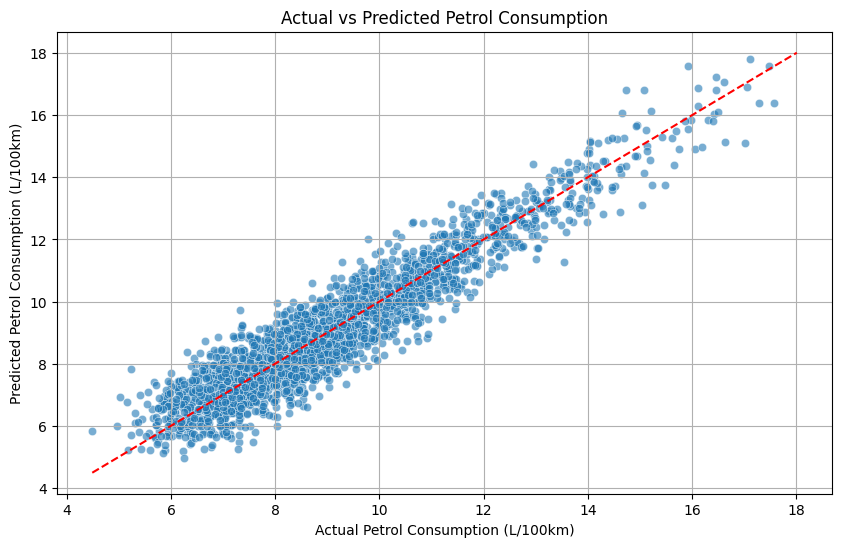

C:\Users\user\AppData\Local\Temp\ipykernel_12476\425113780.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


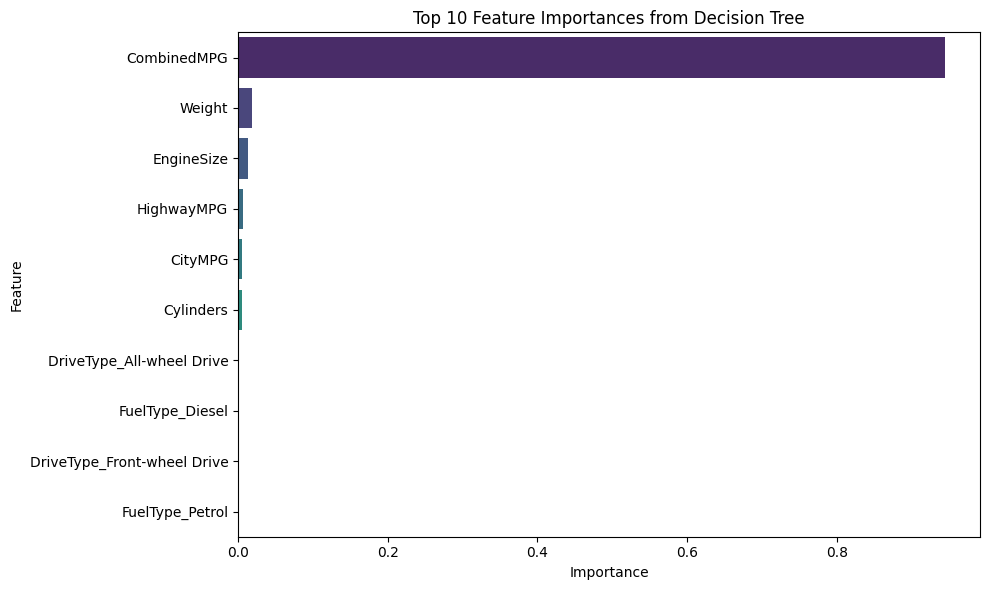

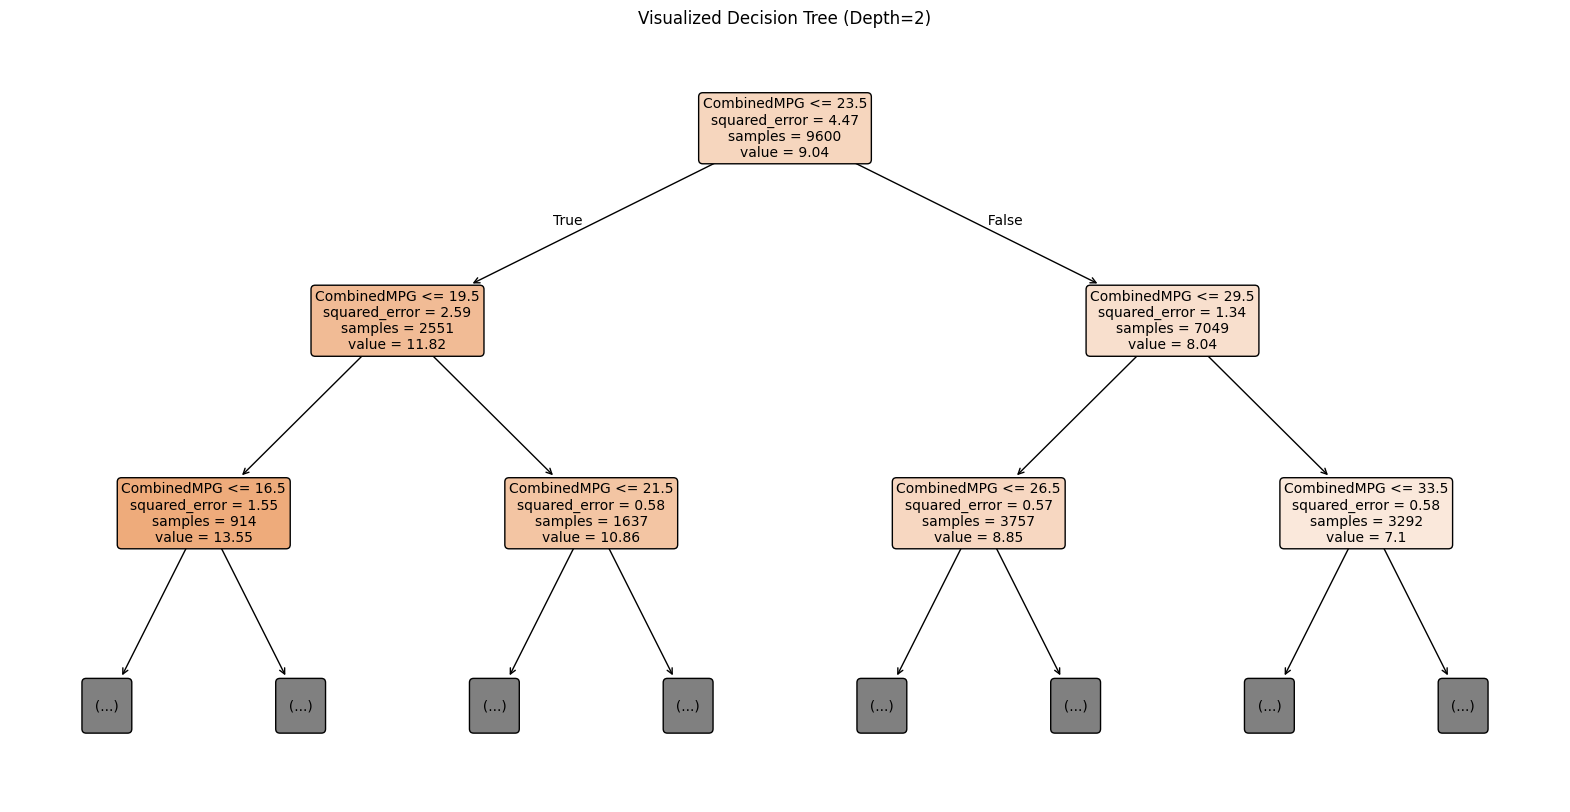

In [6]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Number of rows
n = 12000

# Define possible values for categorical features
fuel_types = ['Petrol', 'Diesel', 'Hybrid']
drive_types = ['Front-wheel Drive', 'Rear-wheel Drive', 'All-wheel Drive']

# Start generating data (without lambda in dict)
data = {
    'VehicleID': range(1, n+1),
    'EngineSize': np.round(np.random.uniform(1.0, 5.0, size=n), 1),
    'Cylinders': np.random.choice([3, 4, 5, 6, 8], size=n, p=[0.1, 0.5, 0.1, 0.2, 0.1]),
    'FuelType': np.random.choice(fuel_types, size=n, p=[0.6, 0.3, 0.1]),
    'CityMPG': np.random.randint(10, 35, size=n),
    'HighwayMPG': np.random.randint(20, 50, size=n),
    'Weight': np.random.randint(2000, 6000, size=n),
    'DriveType': np.random.choice(drive_types, size=n, p=[0.4, 0.3, 0.3]),
}

# Create DataFrame
df = pd.DataFrame(data)

# Now calculate CombinedMPG after creating the DataFrame
df['CombinedMPG'] = (df['CityMPG'] * 0.55 + df['HighwayMPG'] * 0.45).astype(int)

# Convert MPG to Liters per 100 km: L/100km = 235.214583 / MPG
df['PetrolConsumptionL_100km'] = 235.214583 / df['CombinedMPG']
df['PetrolConsumptionL_100km'] = np.round(df['PetrolConsumptionL_100km'], 2)

# Add some noise to make it more realistic
df['PetrolConsumptionL_100km'] += np.random.normal(0, 0.5, size=n)
df['PetrolConsumptionL_100km'] = np.clip(df['PetrolConsumptionL_100km'], 4.0, 25.0)
df['PetrolConsumptionL_100km'] = np.round(df['PetrolConsumptionL_100km'], 2)

# Reorder columns
cols = ['VehicleID', 'EngineSize', 'Cylinders', 'FuelType', 'Weight',
        'DriveType', 'CityMPG', 'HighwayMPG', 'CombinedMPG',
        'PetrolConsumptionL_100km']
df = df[cols]

# Show first few rows
print("First few rows:")
print(df.head())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))
# Save to CSV
df.to_csv('petrol_consumption.csv', index=False)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('petrol_consumption.csv')

# Display first few rows
print("First few rows:")
print(df.head())

# Separate features and target
X = df.drop(columns=['VehicleID', 'PetrolConsumptionL_100km'])
y = df['PetrolConsumptionL_100km']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical Columns: {categorical_cols}")
print(f"Numerical Columns: {numerical_cols}")

# Preprocessor with One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} L/100km")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} L/100km")
print(f"R² Score: {r2:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Petrol Consumption (L/100km)')
plt.ylabel('Predicted Petrol Consumption (L/100km)')
plt.title('Actual vs Predicted Petrol Consumption')
plt.grid(True)
plt.show()

# Optional: Feature Importances
# Get feature names after one-hot encoding
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))

importances = model.named_steps['regressor'].feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()

# === VISUALIZE THE TREE ===
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
# Get feature names after encoding
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))

# Plot the tree
plot_tree(model.named_steps['regressor'],
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=2,
          precision=2)
plt.title("Visualized Decision Tree (Depth=2)")
plt.show()